## Libraries

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import CCA
import numpy as np
import random

## Download the USE Module

In [1]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3"
embed = hub.Module(module_url)

## Generate Embedding

In [3]:
def generate_embedding(sentences):
    with tf.Session() as session:
        session.run([tf.global_variables_initializer(), tf.tables_initializer()])
        message_embeddings = session.run(embed(sentences))
    return(message_embeddings)

## Calculate the percentage change in the dimensions between two sentences

In [4]:
# Pick a threshold which is the minimum amount of percentage change which we are looking for
limit = 10

def calc_diff(embeds):
    # Calculate the % change for each dimension
    diff = [(a - b)/a for a,b in zip(embeds[0], embeds[1])]
    # Get the positive values for each element on the list
    diff = [abs(x) for x in diff]
    value = []
    dim = []
    avgs = []
    res = {}
    for n,v in enumerate(diff):
        avgs.append(v)
        if v > limit or v < -limit:
            value.append(v)
            dim.append(n)
    avg = sum(avgs) / len(avgs)
    res["dims"] = dim
    res["avg"] = avg
    res["value"] = value
    return(res)

## Compare the embeddings visually with bar chart show changes and scatterplot of all datapoints

In [5]:
def charts(results, embeds, messages):
    plt.figure(figsize=(20, 14))
    y_pos = np.arange(len(results["dims"]))
    plt.tight_layout(pad=0.9, w_pad=0.5, h_pad=1.0)
    plt.subplot(2, 1, 1)
    p=plt.bar(y_pos, results["value"], align='center', alpha=0.5, color='black')
    plt.xticks(y_pos, results["dims"])
    plt.ylabel('Percent difference', fontsize=25)
    plt.title('Dimensions with change > %s percent' % (limit), fontsize=25)

    plt.xlabel("Dimemsions count: %s, Average change: %r" % (len(results["dims"]), round(results["avg"], 2)),
               fontsize=18)

    plt.subplot(2, 1, 2)
    plt.scatter(embeds[0], embeds[1], marker="o", c=["black"], s=25)
    plt.title('Comparing similarity', fontsize=24)
    plt.xlabel("%s - x axis \n %s - y axis" % (messages[0], messages[1]), fontsize=25, 
               color="black", wrap=True)

    plt.show()

## Test some sentences

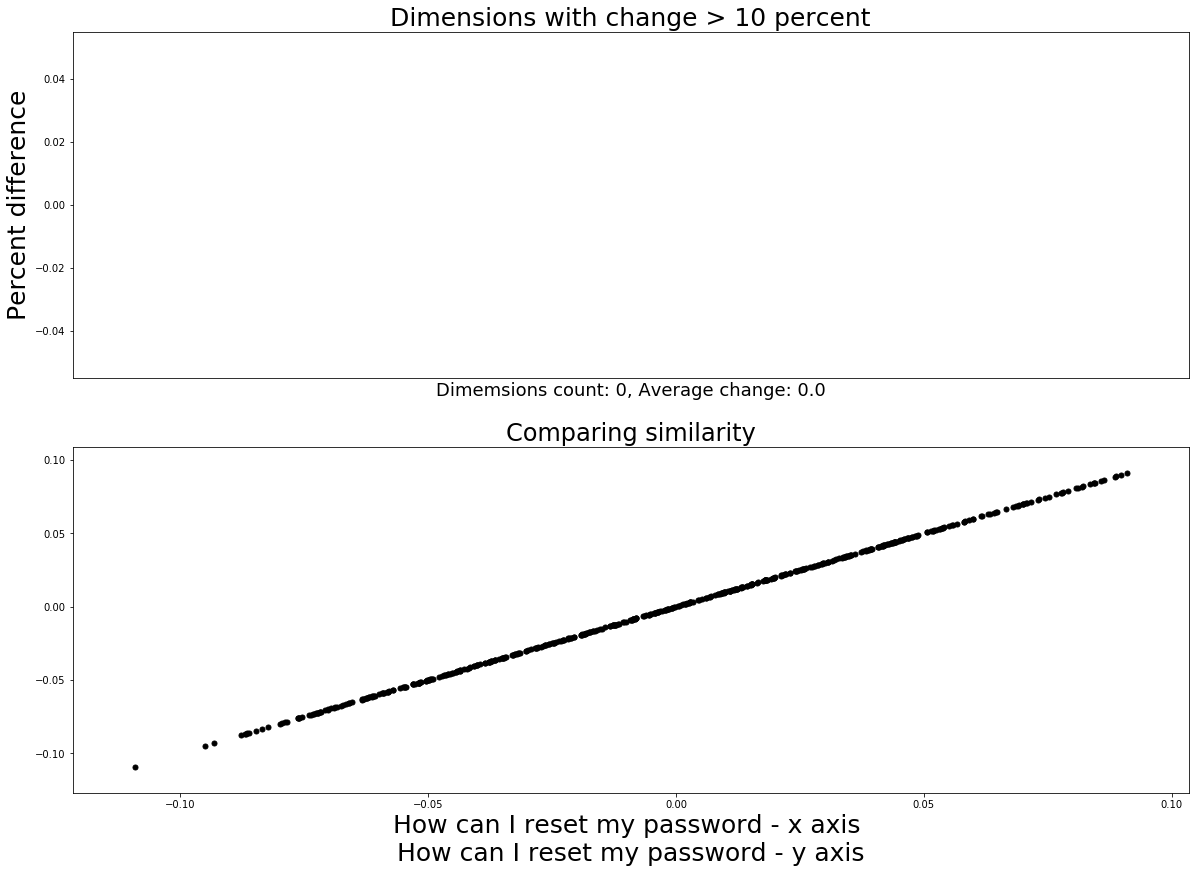

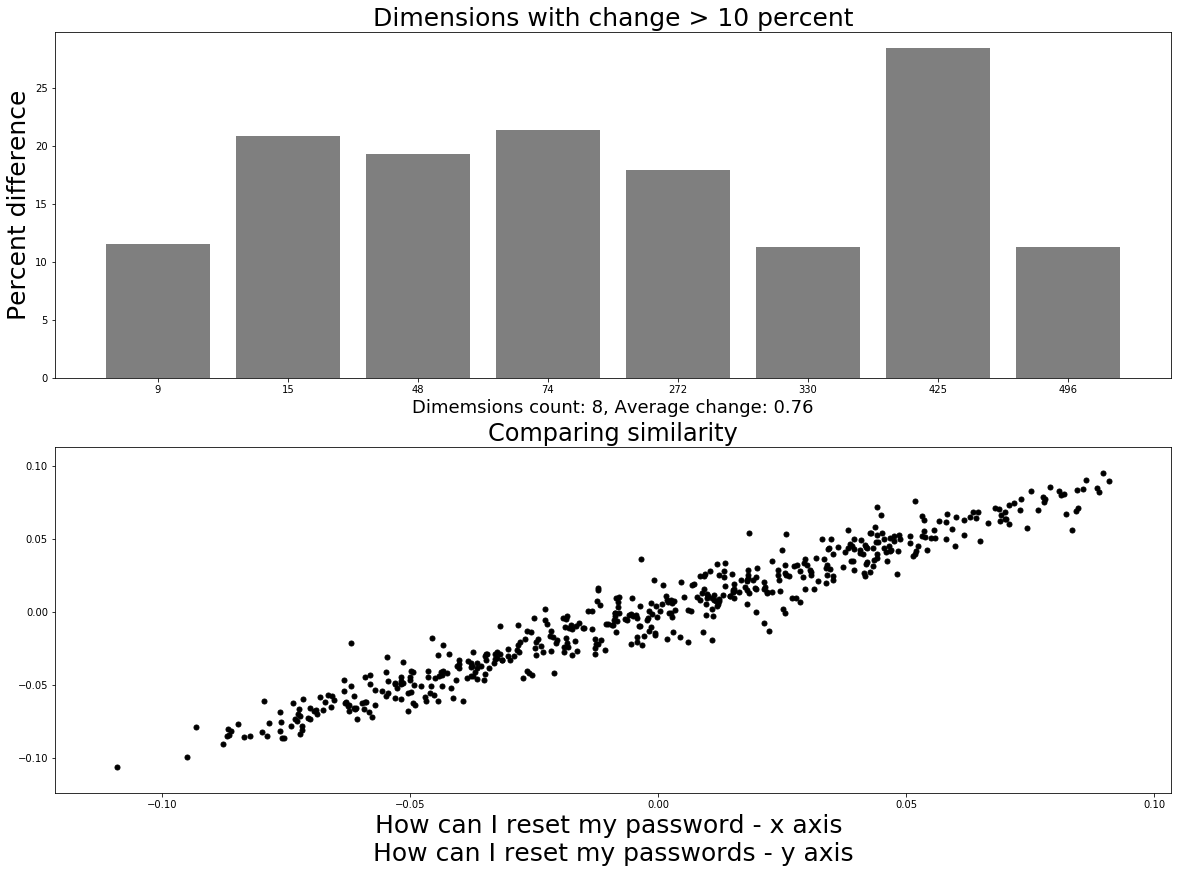

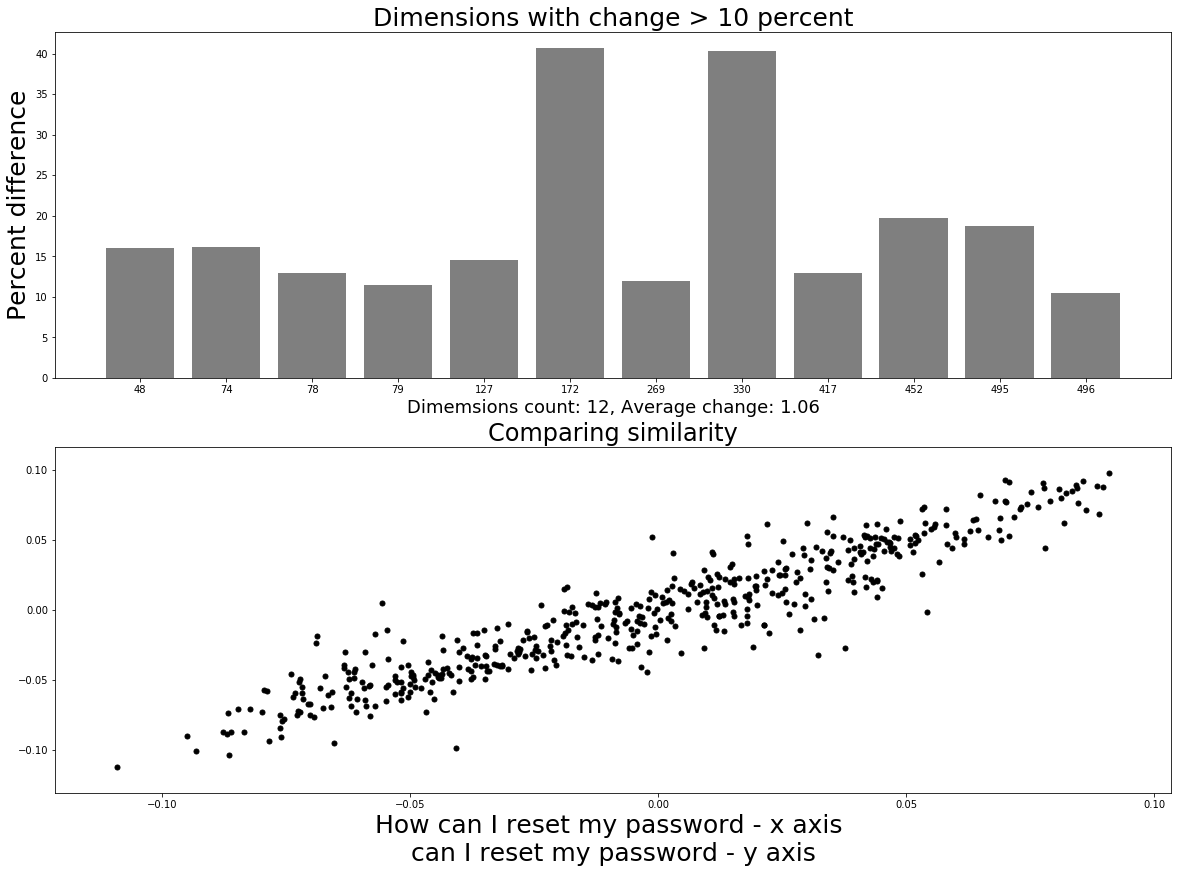

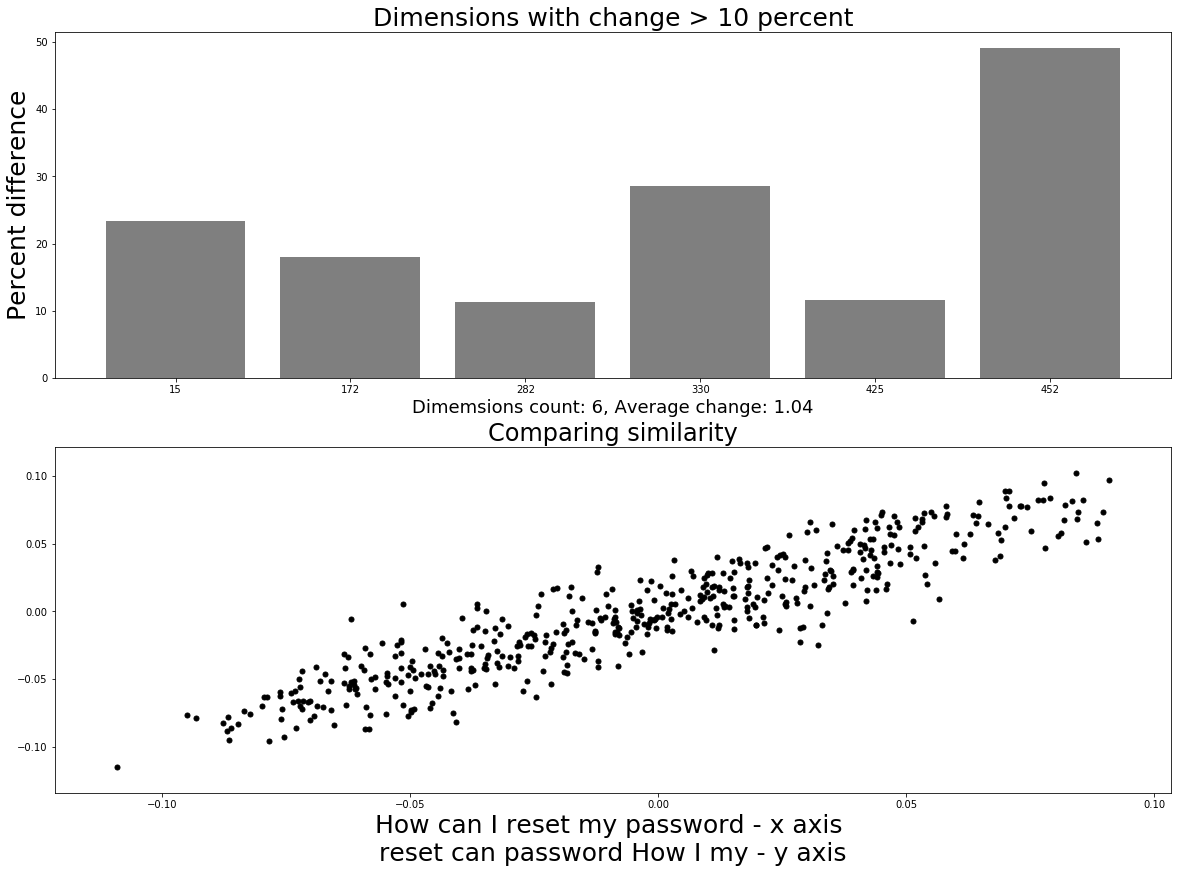

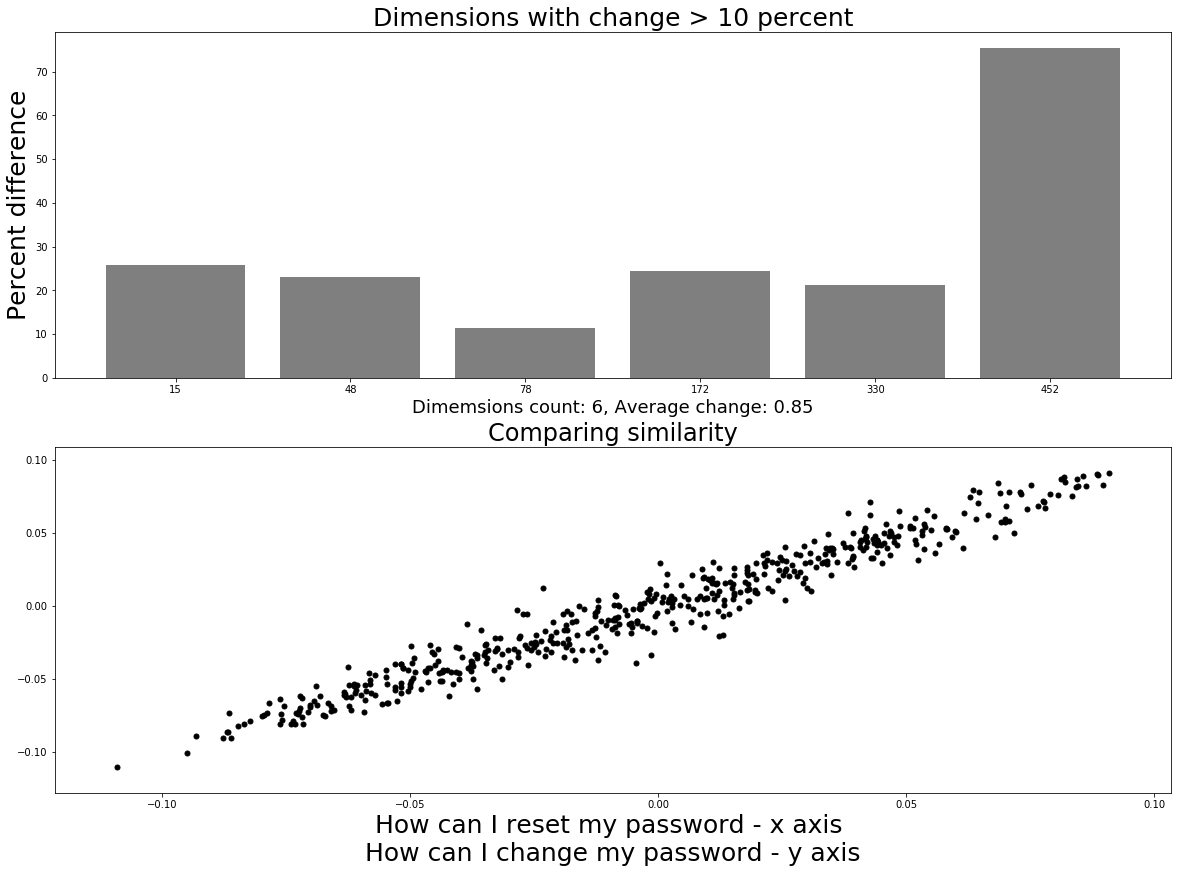

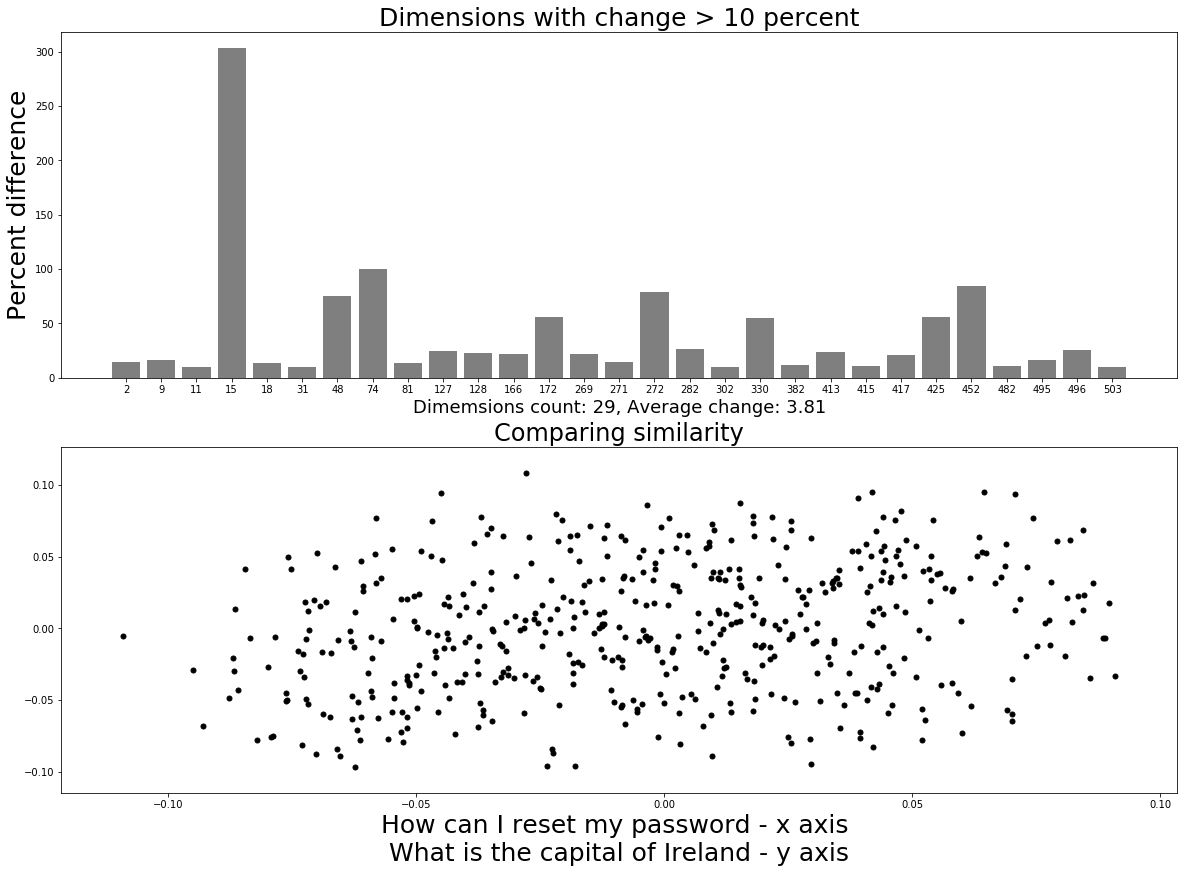

In [6]:
# Replace these examples with your own sentences
sentences = [
    ["How can I reset my password", "How can I reset my password"],
    ["How can I reset my password", "How can I reset my passwords"],
    ["How can I reset my password", "can I reset my password"],
    ["How can I reset my password", "reset can password How I my"],
    ["How can I reset my password", "How can I change my password"],
    ["How can I reset my password", "What is the capital of Ireland"],
            ]

for sentence in sentences:
    embeds = generate_embedding(sentence)
    diffs = calc_diff(embeds)
    charts(diffs, embeds, sentence)
    